In [1]:
#ds imports
import pandas as pd
import numpy as np
import os
import wranglerer as wr
import modeling as md
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["font.size"] = 10
# splitting
from sklearn.model_selection import train_test_split
import scipy.stats as stats
# sklearn
import sklearn.preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
#CATboost imports
from catboost import CatBoostClassifier


## ACQUIRE

In [2]:
# read nba.csv and remove the Team Name Column.
df = wr.wrangle_nba()

In [3]:
df.head()

,fg_pct,opp_fg_pct,three_pt_pct,opp_three_pt_pct,ft_pct,rebounds,opp_rebounds,assists,steals,opp_steals,trnovrs_commited,pts,opp_pts,opp_fouls,prev_season,playoffs
0,0.464,0.458,0.173,0.251,0.771,46.3,44.2,23.5,9.6,8.4,18.3,105.2,102.3,26.6,1,1
1,0.490,0.470,0.384,0.286,0.779,43.3,40.7,25.9,9.5,8.1,18.1,109.4,101.9,24.2,0,1
2,0.484,0.496,0.255,0.271,0.779,42.4,41.5,25.5,8.3,10.0,19.9,104.3,107.0,26.1,0,0
3,0.474,0.501,0.193,0.291,0.772,42.0,44.1,24.0,8.7,8.1,15.6,106.7,106.4,23.2,0,0
4,0.463,0.492,0.325,0.327,0.737,44.7,44.1,24.2,8.7,9.5,17.9,103.4,107.6,23.7,1,0


## SUMMARY REPORT

In [4]:
# of Note, Zero Missingness!
wr.summarize(df)

SUMMARY REPORT


Dataframe head: 
   fg_pct  opp_fg_pct  three_pt_pct  opp_three_pt_pct  ft_pct  rebounds  \
0   0.464       0.458         0.173             0.251   0.771      46.3   
1   0.490       0.470         0.384             0.286   0.779      43.3   
2   0.484       0.496         0.255             0.271   0.779      42.4   
3   0.474       0.501         0.193             0.291   0.772      42.0   
4   0.463       0.492         0.325             0.327   0.737      44.7   

   opp_rebounds  assists  steals  opp_steals  trnovrs_commited    pts  \
0          44.2     23.5     9.6         8.4              18.3  105.2   
1          40.7     25.9     9.5         8.1              18.1  109.4   
2          41.5     25.5     8.3        10.0              19.9  104.3   
3          44.1     24.0     8.7         8.1              15.6  106.7   
4          44.1     24.2     8.7         9.5              17.9  103.4   

   opp_pts  opp_fouls  prev_season  playoffs  
0    102.3       26.6        

## UNIVARIATE HIST PLOTS

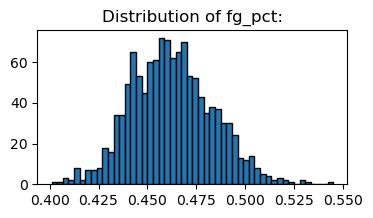

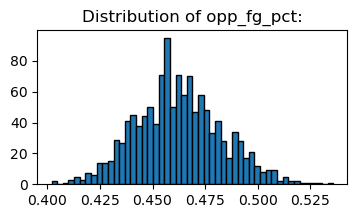

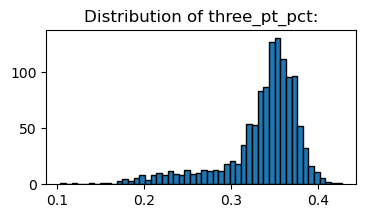

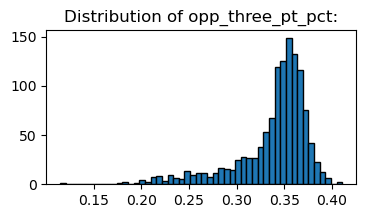

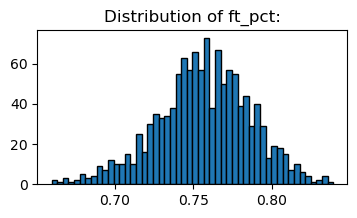

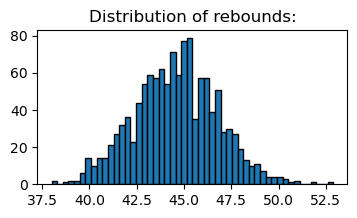

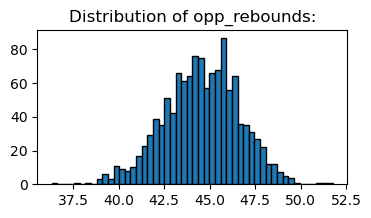

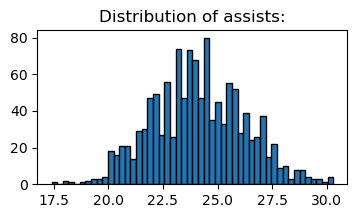

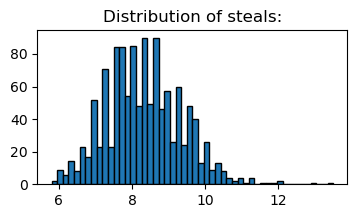

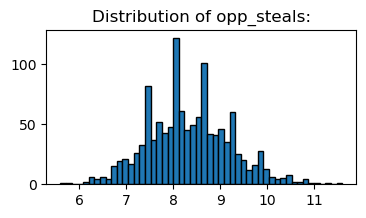

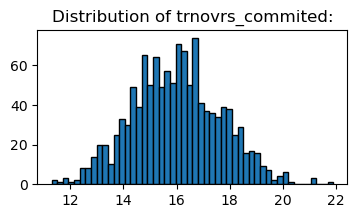

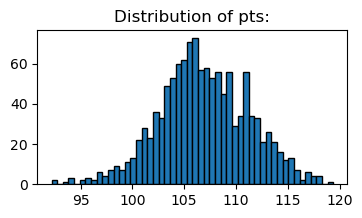

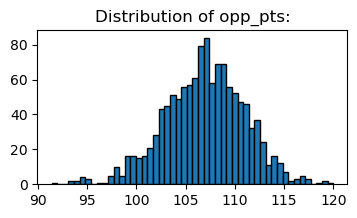

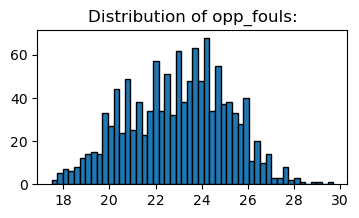

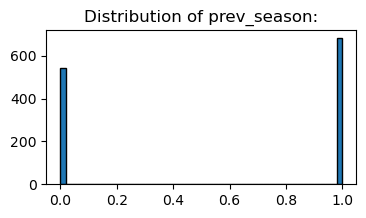

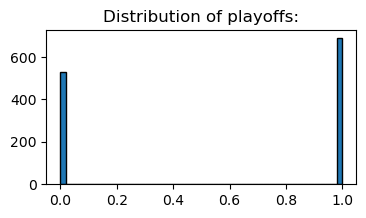

In [6]:
# Mostly Normal distributions!  3-Pt-Pct is left-skewed due to the learning curve required for teams to
# learn how to shoot 3-pointers effectively.
# Outliers exist, however they represent a small percentage of data points, for expediency, they will remain
# in the dataset.
wr.get_hist(df)

## SPLIT

In [7]:
train, validate, test = wr.split_data(df)
train.shape, validate.shape, test.shape

((732, 16), (271, 16), (221, 16))

## BI-VARIATE PLOTS Continuous vs Categorical

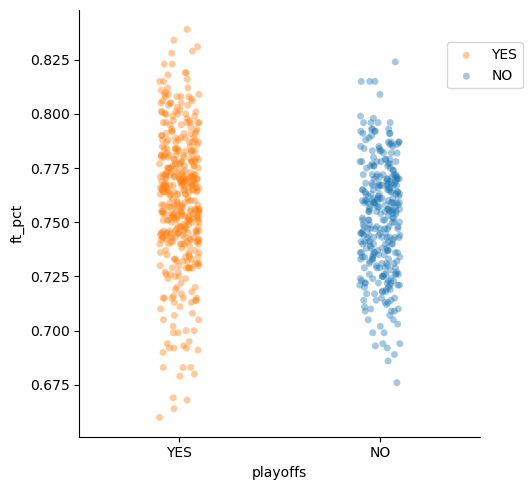

In [21]:
# DO Free Throws win games?
sns.catplot(data=train, x='playoffs', y='ft_pct',hue='playoffs',order=[1,0],alpha=0.4,ec='black')
plt.xticks(ticks=[0,1],labels=['YES','NO'])
plt.legend(labels=['YES','NO'],loc='lower left', bbox_to_anchor=(.9, .8))
plt.show()

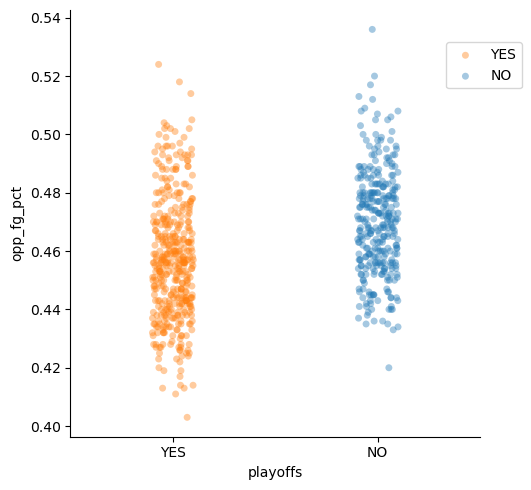

In [22]:
# How about solid, shutdown Defense?
sns.catplot(data=train, x='playoffs', y='opp_fg_pct',hue='playoffs',order=[1,0],alpha=0.4,ec='black')
plt.xticks(ticks=[0,1],labels=['YES','NO'])
plt.legend(labels=['YES','NO'],loc='lower left', bbox_to_anchor=(.9, .8))
plt.show()

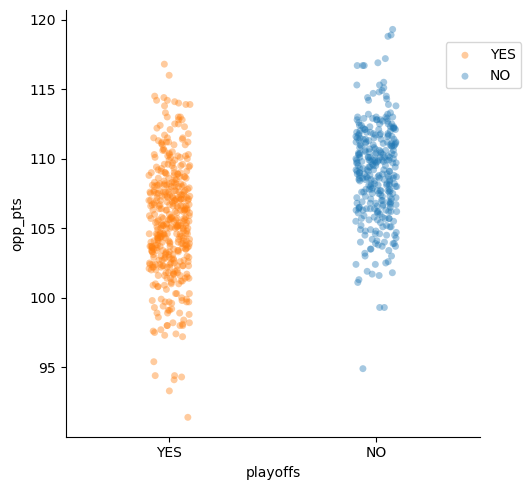

In [16]:
# Yes, defense does win games
sns.catplot(data=train, x='playoffs', y='opp_pts',hue='playoffs',order=[1,0],alpha=0.4,ec='black')
plt.xticks(ticks=[0,1],labels=['YES','NO'])
plt.legend(labels=['YES','NO'],loc='lower left', bbox_to_anchor=(.9, .8))
plt.show()